# XGBoost uses the classification of the Sklearn interface

In [1]:
from xgboost.sklearn import XGBClassifier

clf = XGBClassifier(
    #If set to 1, there is no run information output, preferably 0. 
    #Whether to print messages while running the upgrade.
    silent=0,  
    learning_rate=0.01,
    n_estimators=1000,
    # With this parameter (3-10), the greater the depth of the construction tree, the easier it is to overfit
    max_depth= 7,    
    min_child_weight = 1,

    
    gamma = 0.1,  

    
    colsample_bytree=0.9, 
    subsample=0.8,  
    
    # The maximum incremental step size we allow for each tree weight estimate
    # max_delta_step=0,      
    
    #The multi-category questions specify learning tasks and corresponding learning objectives
    #objective= 'multi:softmax',
    objective= 'multi:softmax',
    reg_lambda=1,

    #reg_alpha=0.01,  # L1 regular term parameter

    # nthread=4,   # The number of CPU threads is maximum by default

    # scale_pos_weight=1,   
    #     If the value is greater than 0, 
    #     it is conducive to rapid convergence and balance the positive 
    #     and negative weights in the case of unbalanced category samples
    seed = 20,
    nuum_class =6
)


In [2]:
import pandas as pd
X_train = pd.read_csv("../MLinTheUnknown-Data/X_train.csv", header=None)
y_train = pd.read_csv("../MLinTheUnknown-Data/y_train.csv", header=None)
X_val = pd.read_csv("../MLinTheUnknown-Data/X_val.csv", header=None)
y_val = pd.read_csv("../MLinTheUnknown-Data/y_val.csv", header=None)
X_test = pd.read_csv("../MLinTheUnknown-Data/X_test.csv", header=None)

# PCA--dimension reduc

In [3]:
from sklearn.decomposition import PCA, IncrementalPCA
import numpy as np



pca = PCA(n_components=40, random_state=42)
# random_state=42
X_train = pca.fit_transform (X_train)
X_val = pca.transform (X_val)


# del_dims = filter_features(X_train, y_train)
# X_train, y_train = del_features(X_train,y_train, del_dims)
# X_val,  y_val  = del_features(X_val,y_val, del_dims)



In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)

#  min-max noramlizaion
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_val = min_max_scaler.transform(X_val)

# normalizer = Normalizer()
# X_train = normalizer.fit_transform(X_train)
# X_val = normalizer.transform(X_val)


#Normalization

# hyper-parameter tuning

## step1: max_depth  and min_weight  selecting

In [5]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np

from sklearn.model_selection import RandomizedSearchCV
# param_grid
# param_distributions
kf = KFold( shuffle = True, random_state=0)

params_test = False


if params_test == True:
    param_test1 = {
    'max_depth':range(3,11,2),
    'min_child_weight':range(1,6,2)
    }

    gsearch1 = GridSearchCV(
        estimator = XGBClassifier(), 
        param_grid = param_test1,

        scoring='f1_macro',
        n_jobs=-1,
        cv= kf,
        verbose=3
       
    )

    gsearch1.fit(X_train, y_train)


    print(gsearch1.best_params_)
    print()
    print(gsearch1.best_score_)
    print()
    print()



## step2:Gamma and N_ESTIMATORS  tuning

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


Gamma =False

if Gamma== True:
    param_test2 = {
        'gamma':[i/10.0 for i in range(0,5)],
        }
    gsearch2 = GridSearchCV(
        estimator = XGBClassifier(),              
        param_grid = param_test2, 

        scoring='f1_macro',
        n_jobs=-1,
        cv= kf,
        verbose=3
        )
    gsearch2.fit(X_train, y_train)
    print(gsearch2.best_params_)
    print()
    print(gsearch2.best_score_)
    print()
    print()



## step3: subsample and colsample_bytree  tuning

In [7]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

punning_params4= False
if punning_params4==True:
    param_test3 = {
        'subsample':[i/10.0 for i in range(6,10)],
        'colsample_bytree':[i/10.0 for i in range(6,10)],
        }
    
    gsearch3 = GridSearchCV(
        estimator = XGBClassifier(),   
        param_grid = param_test3, 
        scoring='f1_macro',
        n_jobs=-1,
        cv= kf,
        verbose=3
        )

    gsearch3.fit(X_train, y_train)
    print(gsearch3.best_params_)
    print()
    print(gsearch3.best_score_)
    print()
    print()



## step4:  Based on the above, adjust 'N_ESTIMATORS' separately:


In [8]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


N_estimators = False
if N_estimators == True:
    param_test4 = {
          'n_estimators': range(200, 2000, 100)
          }
    gsearch4 = GridSearchCV(
          estimator = XGBClassifier(), 
        
          param_grid = param_test4, 


          scoring='f1_macro',
          n_jobs=-1,
          cv= kf,
          verbose=3

          )

    gsearch4.fit(X_train, y_train)
    print(gsearch4.best_params_)
    print()
    print(gsearch4.best_score_)
    print()
    print()


## step5: Regularization parameter tuning 


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


RE = False
if RE == True:
    param_test5 = {
        'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
        }
    gsearch5 = GridSearchCV(
        estimator = XGBClassifier(),  
        param_grid = param_test5, 

        scoring='f1_macro',
        n_jobs=-1,
        cv= kf,
        verbose=3
        )

    gsearch5.fit(X_train, y_train)
    print(gsearch5.best_params_)
    print()
    print(gsearch5.best_score_)
    print()
    print()

## step6: seed,  objective tuning 

In [10]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np 
from sklearn.model_selection import GridSearchCV


SEED = False
if SEED == True:
    param_test6 ={
        'seed': np.arange(20, 400, step =50),
        'objective': ['multi:softmax','binary:logistic']
    }

    gsearch6 = GridSearchCV(
        estimator = XGBClassifier(
            max_depth=7,
            learning_rate=0.01,
            n_estimators=1000,
            gamma = 0.1,  
            silent=True,
            objective='multi:softmax',
            colsample_bytree=0.9, 
            subsample=0.8,
            seed=20,
        ),
        
        param_grid = param_test6,
        
        cv= kf,
        scoring='f1_macro',
        verbose=3,
        n_jobs=-1 
    )
    
    gsearch6.fit(X_train, y_train)
    print(gsearch6.best_params_)
    print()
    print(gsearch6.best_score_)
    print()
    print()


adjusting learning rate

In [11]:
# adjust_lr = True
# if adjust_lr == True:

#     xgb_lr = XGBClassifier()

#     modelfit(xgb_lr, X_train, y_train)

# K-fold for train set

In [12]:

import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
import numpy as np
from xgboost.sklearn import XGBClassifier

K_fold_train =True
if K_fold_train == True:
    kf = KFold( shuffle = True, random_state=0)
    f1_score_list = []
    X_train = pd.DataFrame(X_train)
    y_train = pd.DataFrame(y_train)

    for train_idx, test_idx in kf.split(X_train):
        model = xgb.XGBClassifier(
            max_depth=7,
            learning_rate=0.05,
            n_estimators=1000,
#             gamma = 0.1,  
            silent=True,
#             objective='multi:softmax',
#             colsample_bytree=0.9, 
#             subsample=0.8,
#             seed=20,
#             num_class = 6
        )

        train_X = X_train.loc[train_idx]
        train_X =np.array(train_X)

        train_y = y_train.loc[train_idx]
        train_y =np.array(train_y).ravel()

        val_X = X_train.loc[test_idx]
        val_X = np.array(val_X)

        val_y = y_train.loc[test_idx]
        val_y = np.array(val_y).ravel()


        model.fit(train_X,train_y)
        pred = model.predict(val_X)

        f1= f1_score(val_y,  pred,  average='weighted')
        f1_score_list.append(f1)

    print(f"==K-Fold==f1-score: {(np.array(f1_score_list)).mean()}")

==K-Fold==f1-score: 0.994131205174793


# validiation

In [13]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Validation = True


if Validation == True:
    X_train = np.array(X_train)
    y_train = np.array(y_train).ravel()

    model = xgb.XGBClassifier(
            max_depth=7,
            learning_rate=0.05,
            n_estimators=1000,
#             gamma = 0.1,  
            silent=True,
            objective='multi:softmax',
#             colsample_bytree=0.9, 
#             subsample=0.8,
#             seed=20,
#             num_class = 6
    )

    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    
    print(classification_report(y_val, y_pred))

    f1_macro = f1_score(y_val, y_pred, average='weighted')
    print("f1_score(weighted)",f1_macro)
    

    f1_micro = f1_score(y_val, y_pred, average='micro')
    print("f1_score(micro)",f1_micro)




              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       512
         2.0       0.99      0.99      0.99       552
         3.0       1.00      0.98      0.99       327
         4.0       1.00      1.00      1.00       408
         5.0       0.99      1.00      0.99       622
         6.0       1.00      0.99      1.00       361

    accuracy                           0.99      2782
   macro avg       1.00      0.99      0.99      2782
weighted avg       0.99      0.99      0.99      2782

f1_score(weighted) 0.9946039415911787
f1_score(micro) 0.994608195542775


In [14]:
X_test= pca.transform(X_test)


y_test_pred = model.predict(X_test)

In [15]:
pd.DataFrame(y_test_pred)

,0
0,1.0
1,2.0
2,6.0
3,5.0
4,2.0
...,...
2777,2.0
2778,2.0
2779,6.0
2780,5.0


<Figure size 1296x1296 with 0 Axes>

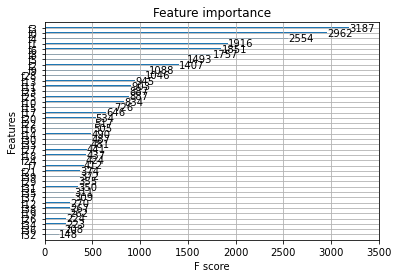

In [16]:
plt.figure(figsize=(18,18))
plot_importance(model)
plt.show()